## 데이터 불러오기

In [1]:
import pandas as pd
df=pd.read_csv('Heart.csv',index_col=0)
df=df.dropna()

In [2]:
df.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [3]:
df.dtypes

Age            int64
Sex            int64
ChestPain     object
RestBP         int64
Chol           int64
Fbs            int64
RestECG        int64
MaxHR          int64
ExAng          int64
Oldpeak      float64
Slope          int64
Ca           float64
Thal          object
AHD           object
dtype: object

## X와 y 분리하기

In [4]:
y=df.pop('AHD')
X=df

In [5]:
## Yes는 1 No는 0
y=(y=='Yes')*1

In [6]:
y

1      0
2      1
3      1
4      0
5      0
      ..
298    1
299    1
300    1
301    1
302    1
Name: AHD, Length: 297, dtype: int64

## 범주형 변수 One_hot_encoding 하기

In [7]:
X = pd.get_dummies(X)
X

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,ChestPain_asymptomatic,ChestPain_nonanginal,ChestPain_nontypical,ChestPain_typical,Thal_fixed,Thal_normal,Thal_reversable
1,63,1,145,233,1,2,150,0,2.3,3,0.0,0,0,0,1,1,0,0
2,67,1,160,286,0,2,108,1,1.5,2,3.0,1,0,0,0,0,1,0
3,67,1,120,229,0,2,129,1,2.6,2,2.0,1,0,0,0,0,0,1
4,37,1,130,250,0,0,187,0,3.5,3,0.0,0,1,0,0,0,1,0
5,41,0,130,204,0,2,172,0,1.4,1,0.0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,140,241,0,0,123,1,0.2,2,0.0,1,0,0,0,0,0,1
299,45,1,110,264,0,0,132,0,1.2,2,0.0,0,0,0,1,0,0,1
300,68,1,144,193,1,0,141,0,3.4,2,2.0,1,0,0,0,0,0,1
301,57,1,130,131,0,0,115,1,1.2,2,1.0,1,0,0,0,0,0,1


## 데이터 나누기

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [9]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(237, 18)
(60, 18)
(237,)
(60,)


## 수치데이터 정규화하기

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [11]:
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

## 모델 만들기

In [30]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [26]:
def build_model():
    model = tf.keras.Sequential([
        layers.Dense(64, activation='relu',input_shape=[X_train_std.shape[1]]),
        layers.Dense(64, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])

    model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])
    return model

In [27]:
model=build_model()
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 64)                1216      
_________________________________________________________________
dense_13 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 65        
Total params: 5,441
Trainable params: 5,441
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.predict(X_train_std[:10,:])

array([[0.50869524],
       [0.5617158 ],
       [0.55164254],
       [0.5962263 ],
       [0.62537557],
       [0.63794905],
       [0.7594202 ],
       [0.56081724],
       [0.81302464],
       [0.73575175]], dtype=float32)

In [36]:
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')
    
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)    
# history = model.fit(X_train_std, y_train, epochs=1000, validation_split = 0.2, verbose = 0, callbacks=[early_stop, PrintDot()])

history = model.fit(X_train_std, y_train, epochs=1000, validation_split = 0.2 ,verbose=0, callbacks=[PrintDot()] )



....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

In [37]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist

,loss,accuracy,val_loss,val_accuracy,epoch
0,0.229590,0.920635,0.464870,0.770833,0
1,0.222367,0.920635,0.467036,0.770833,1
2,0.215852,0.920635,0.470021,0.770833,2
3,0.209370,0.925926,0.472741,0.770833,3
4,0.203414,0.925926,0.478424,0.750000,4
...,...,...,...,...,...
995,0.000010,1.000000,2.518598,0.708333,995
996,0.000010,1.000000,2.519179,0.708333,996
997,0.000010,1.000000,2.520478,0.708333,997
998,0.000010,1.000000,2.521423,0.708333,998


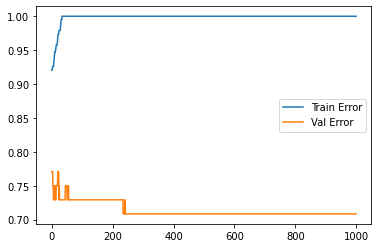

In [38]:
import matplotlib.pyplot as plt
plt.plot(hist['epoch'], hist['accuracy'], label='Train Error')
plt.plot(hist['epoch'], hist['val_accuracy'],label = 'Val Error')
plt.legend()
plt.show()



..................

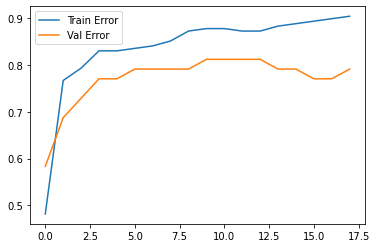

In [40]:
model=build_model()
history = model.fit(X_train_std, y_train, epochs=1000, validation_split = 0.2, verbose = 0, callbacks=[early_stop, PrintDot()])
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
plt.plot(hist['epoch'], hist['accuracy'], label='Train Error')
plt.plot(hist['epoch'], hist['val_accuracy'],label = 'Val Error')
plt.legend()
plt.show()